# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.metrics import accuracy_score,confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [4]:
df=pd.read_csv("marketing.csv")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [7]:
#Forward Fill
#Static Fill
#Backward Fill
df['Income']=df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])
#No duplicate data present

0

### 5. Drop the columns which you think redundant for the analysis 

In [10]:
df=df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')

In [13]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
expense_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

In [15]:
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,776


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [16]:
expense_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Num_Total_Purchases'] = df[expense_columns].sum(axis=1)

In [17]:
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [18]:
df['Kids']=df['Kidhome']+df['Teenhome']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,25,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,6,2
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,21,0


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [20]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,776,21,0,0


### 11. Drop those columns which we have used above for obtaining new features

In [21]:
drop_cols=[ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df=df.drop(columns=drop_cols,axis=1)
df.head(3)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [22]:
df['Age']=2024-df['Year_Birth']
df.drop('Year_Birth',axis=1,inplace=True)
df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59


### 13. Encode the categorical variables in the dataset

In [23]:
df_new=df.copy()

In [24]:
c=['Education','Marital_Status']
lbl_encoder=LabelEncoder()
for i in c:
    df[i]=df[[i]].apply(lbl_encoder.fit_transform)
df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,776,21,0,0,59


### 14. Standardize the columns, so that values are in a particular range

In [26]:
df1=df.copy()
std_col=StandardScaler().fit_transform(df1.values)
std_col_df=pd.DataFrame(std_col,index=df1.index,columns=df1.columns)
std_col_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

Text(0, 0.5, 'Explained Variance Ratio')

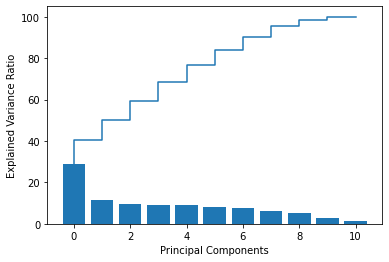

In [29]:
cov_mat=np.cov(std_col.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

plt.bar(range(11),var_exp)
plt.step(range(11),cum_var_exp)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [31]:
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(std_col_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


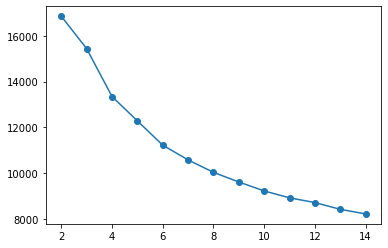

In [36]:
#Finding optimal K - elbow plot
cluster_err=[]
cluster_range=range(2,15)

for n_clusters in cluster_range:
    cluster=KMeans(n_clusters,random_state=100)
    cluster.fit(pca_df)
    cluster_err.append(cluster.inertia_)
cluster_df=pd.DataFrame({'n_clusters':cluster_range,'cluster_err':cluster_err})
plt.plot(cluster_df['n_clusters'],cluster_df['cluster_err'],marker='o')

In [37]:
#K-Means
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [38]:
label=pd.DataFrame(kmeans.labels_,columns=['Label'])
kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,0
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,2


In [39]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

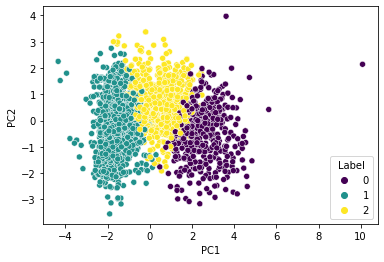

In [44]:
sns.scatterplot(data=kmeans_df,x='PC1',y='PC2',hue='Label',palette='viridis')

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

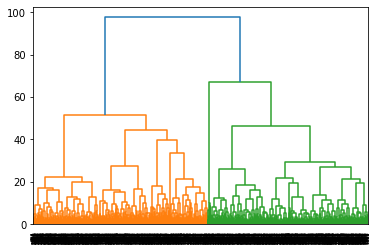

In [45]:
merg=linkage(std_col,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.show()

In [48]:
for i in range(2,25):
    hier=AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(std_col_df)
    labels=hier.fit_predict(std_col_df)
    print(i, silhouette_score(std_col_df,labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249
15 0.0991615711069726
16 0.09710952571690447
17 0.09489252379414646
18 0.09364631036627927
19 0.09198831621674032
20 0.09444749864898916
21 0.09485319565495526
22 0.0966801153165996
23 0.10011826448627932
24 0.10008982911463447


In [50]:
hie_cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
hie_cluster_model=hie_cluster.fit(std_col_df)

In [51]:
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,0


In [52]:
df_hier=df_new.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

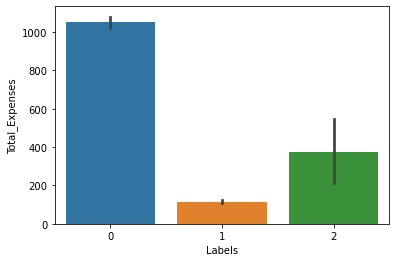

In [56]:
sns.barplot(data=df_hier,x='Labels',y='Total_Expenses')
plt.show()
#The Total_Expenses is much 
# higher for cluster 0 compared to the clusters 1 and 2.
# Where as the Income is also higher 
# for the cluster 0 followed by cluster 2.

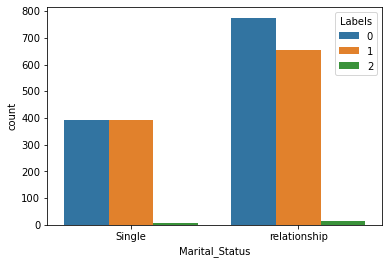

In [57]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()
# most of the customers who are in a relationship falls under cluster 0

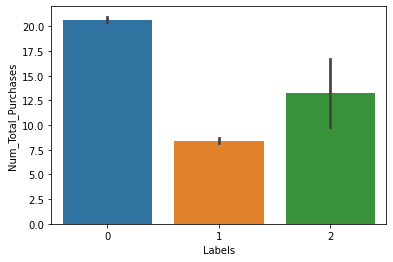

In [59]:
sns.barplot(data=df_hier,x='Labels',y='Num_Total_Purchases')
plt.show()
# The Total number of purchases is also much higher for customers from 
# cluster 0 compared to cluster 1 and 2.

-----
## Happy Learning
-----